### Michelle Kouba
### Predicting Poisonous Mushrooms - Decision Tree

In [ ]:
# Import and inspect dataframe
df = pd.read_csv('mushrooms.csv')
# Checking how many variables and respondents we have.
df.shape

(8124, 23)

## Data Preparation

In [ ]:
# Splitting the database into two types of columns since we are doing different
# substitutions with the numerical (mean) columns and the categorical columns (mode).
numeric_columns = df.select_dtypes(include=np.number)
categorical_columns = df.select_dtypes(include=['object'])
# Converting all categorical variables to dummy variables.
categorical_columns = pd.get_dummies(categorical_columns)

In [ ]:
# Merging numeric and categorical columns back together
df = pd.concat([numeric_columns, categorical_columns],axis=1)
df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Creating X and Y variables for analysis.
# Selecting all features (except for edible and poisonous which are the predictor variable)
X = df.drop(['class_e', 'class_p'],axis=1)
# Selecting edible yes/no as the predictor variable.
y = df['class_e']

In [ ]:
# Splitting the dataset into the training set and the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Decision Tree Analysis

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset based on training data
y_pred = clf.predict(X_test)
# Evaluating the accuracy of  Decision Tree Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


[Text(196.94117647058823, 203.85, 'X[27] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3143, 3356]'),
 Text(118.16470588235295, 176.67000000000002, 'X[53] <= 0.5\ngini = 0.282\nsamples = 3664\nvalue = [3042, 622]'),
 Text(78.7764705882353, 149.49, 'X[63] <= 0.5\ngini = 0.131\nsamples = 3239\nvalue = [3011, 228]'),
 Text(59.082352941176474, 122.31, 'X[25] <= 0.5\ngini = 0.046\nsamples = 3083\nvalue = [3011, 72]'),
 Text(39.38823529411765, 95.13, 'X[22] <= 0.5\ngini = 0.021\nsamples = 3043\nvalue = [3011, 32]'),
 Text(19.694117647058825, 67.94999999999999, 'gini = 0.0\nsamples = 3011\nvalue = [3011, 0]'),
 Text(59.082352941176474, 67.94999999999999, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]'),
 Text(78.7764705882353, 95.13, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]'),
 Text(98.47058823529412, 122.31, 'gini = 0.0\nsamples = 156\nvalue = [0, 156]'),
 Text(157.5529411764706, 149.49, 'X[80] <= 0.5\ngini = 0.135\nsamples = 425\nvalue = [31, 394]'),
 Text(137.85882352941178, 122.31, 'gini =

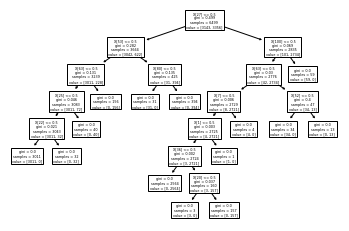

In [ ]:
# Visualizing the decision tree
from sklearn import tree
tree.plot_tree(clf)

In [ ]:
# Using chi squared to select the top five features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
features = X.astype(int)
# Select the five features with the highest chi-squared statistics
chi5_selector = SelectKBest(chi2, k=5)
features_kbest = chi5_selector.fit_transform(features, y)
# Checking my work
print('Original number of features:', features.shape[1])
print('Reduced number of features:', features_kbest.shape[1])
print(chi5_selector.get_support(indices=True))

Original number of features: 117
Reduced number of features: 5
[24 27 37 57 61]


In [ ]:
print('The top five factors are', df.columns[24], ', ', df.columns[27], ',',  df.columns[37], ',',  df.columns[57], ', and',  df.columns[61])

The top five factors are odor_a ,  odor_l , gill-size_b , stalk-root_r , and stalk-surface-above-ring_y


In [ ]:
# Create Decision Tree object for the top 5 features
clf = DecisionTreeClassifier()
# Selecting top five features from above
X_train_5 = X_train[['odor_a', 'odor_l', 'gill-size_b', 'stalk-root_r', 'stalk-surface-above-ring_y']]
X_test_5 = X_test[['odor_a', 'odor_l', 'gill-size_b', 'stalk-root_r', 'stalk-surface-above-ring_y']]
# Train Decision Tree Classifer
clf = clf.fit(X_train_5, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test_5)
# Evaluating accuracy the Decision Tree Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7643076923076924


[Text(558.0, 815.4, 'Broad Gills <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3143, 3356]\nclass = No'),
 Text(372.0, 634.2, 'Anise Odor <= 0.5\ngini = 0.2\nsamples = 2028\nvalue = [1799, 229]\nclass = Yes'),
 Text(279.0, 453.0, 'Almond Odor <= 0.5\ngini = 0.172\nsamples = 1988\nvalue = [1799, 189]\nclass = Yes'),
 Text(186.0, 271.80000000000007, 'Scaly Surface <= 0.5\ngini = 0.148\nsamples = 1956\nvalue = [1799, 157]\nclass = Yes'),
 Text(93.0, 90.60000000000002, 'gini = 0.148\nsamples = 1949\nvalue = [1792, 157]\nclass = Yes'),
 Text(279.0, 90.60000000000002, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Yes'),
 Text(372.0, 271.80000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 32]\nclass = No'),
 Text(465.0, 453.0, 'gini = 0.0\nsamples = 40\nvalue = [0, 40]\nclass = No'),
 Text(744.0, 634.2, 'Anise Odor <= 0.5\ngini = 0.42\nsamples = 4471\nvalue = [1344, 3127]\nclass = No'),
 Text(651.0, 453.0, 'Almond Odor <= 0.5\ngini = 0.436\nsamples = 4188\nvalue = [1344, 2844]\nclass 

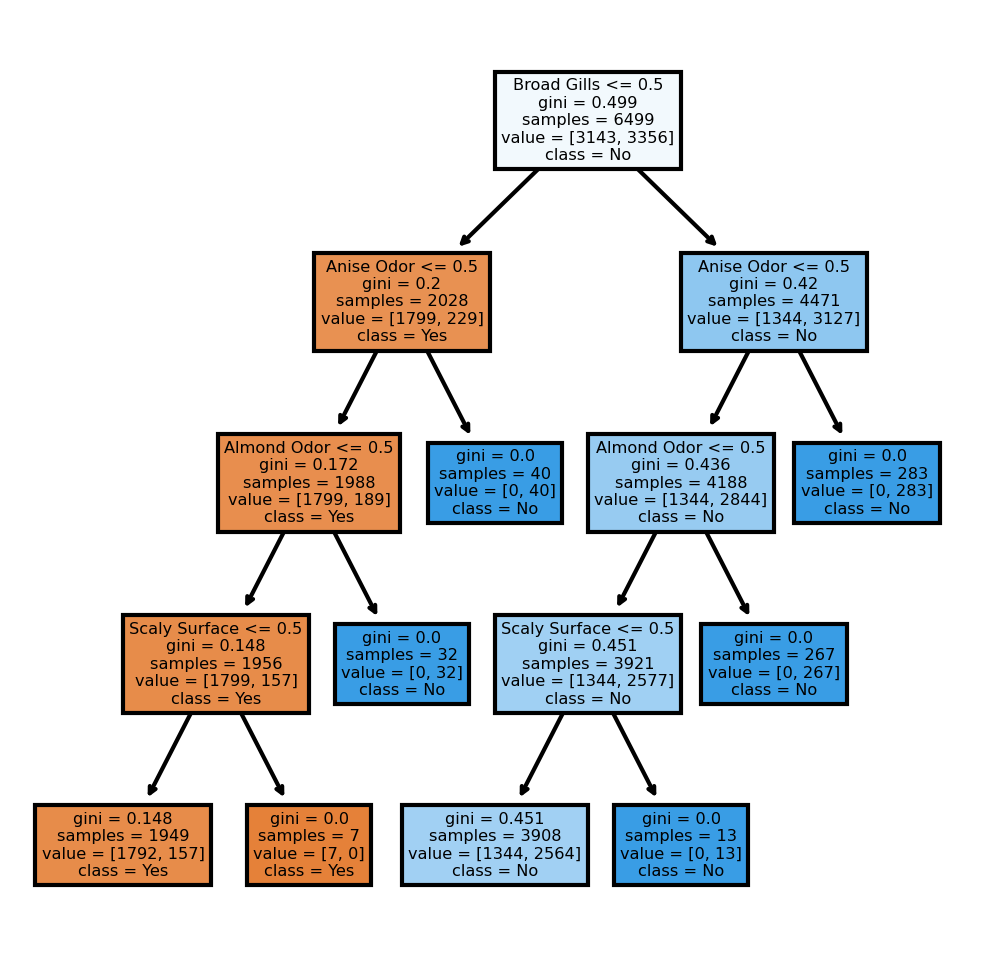

In [ ]:
# Plotting the second decision tree
from sklearn import tree
fn=['Almond Odor','Anise Odor','Broad Gills','Rooted Stalks', 'Scaly Surface']
cn=['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn,
               class_names=cn,
               filled = True)

So while using 117 features gave us an accuracy of 1.0 (100% effective when choosing a poisonous vs edible mushroom), 117 features is way overfitting a model.   When we chose the top five features based on their chi-squared relationship with the predictor (edible vs poisonous), we found that odor_a (almond), odor_l (anise), gill-size_b (broad), stalk-root_r (rooted), and stalk-surface-above-ring_y (scaly) were the most valuable predicators.   When creating a decision tree based on just these five features, the accuracy dropped to 76% (from 100% accuracy) so only having these features' information 3 out of 4 times someone will not DIE from eating poisonous mushrooms. So if you have a mushroom that is either almond or anise smelling, broad in gill size, and a rooted stalk with a scaly surface above the ring, you are 76% likely to not die if you eat it (well be poisoned technically).